<a href="https://colab.research.google.com/github/Ironman2314532/GammaVsHadron-Predicting-Particle-Type-in-MAGIC-Gamma-Telescope/blob/main/MAGIC_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

##### DATASET:
Bock,R.. (2007). MAGIC Gamma Telescope. UCI Machine Learning Repository. https://doi.org/10.24432/C52C8B.

In [ ]:
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
df = pd.read_csv("magic04.data", names=cols)
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

In [ ]:
df["class"] = (df["class"] == "g").astype(int)

In [ ]:
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist  class  
0  40.0920   81.8828      1  
1   6.3609  205.2610      1  
2  76.9600  256.7880      1  
3  10.4490  116.7370      1  
4   4.6480  356.4620      1

In [ ]:
for label in cols[:-1]:
  plt.hist(df[df["class"] == 1][label], color = "blue", label = "gamma", alpha = 0.7, density = True)
  plt.hist(df[df["class"] == 0][label], color = "red", label = "hadron", alpha = 0.7, density = True)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

# Train, validation, test datasets

In [ ]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [ ]:
def scale_dataset(dataframe, oversample=False):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y)

  data = np.hstack((X, np.reshape(y, (len(y), 1))))

  return data, X, y


In [ ]:
train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)

# kNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = knn_model.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75      1321
           1       0.87      0.86      0.86      2483

    accuracy                           0.82      3804
   macro avg       0.81      0.81      0.81      3804
weighted avg       0.82      0.82      0.82      3804



# Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)

In [ ]:
y_pred = nb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.42      0.53      1321
           1       0.75      0.91      0.82      2483

    accuracy                           0.74      3804
   macro avg       0.73      0.67      0.68      3804
weighted avg       0.74      0.74      0.72      3804



# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train, y_train)
y_pred = lg_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.74      0.71      1321
           1       0.85      0.82      0.84      2483

    accuracy                           0.79      3804
   macro avg       0.77      0.78      0.78      3804
weighted avg       0.80      0.79      0.79      3804



# SVC

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm_model = SVC()
svm_model = svm_model.fit(X_train, y_train)

In [ ]:
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81      1321
           1       0.90      0.90      0.90      2483

    accuracy                           0.87      3804
   macro avg       0.86      0.85      0.85      3804
weighted avg       0.87      0.87      0.87      3804



# Neural Network Model

In [ ]:
import tensorflow as tf

In [ ]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10, 4))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)

  plt.show()

In [ ]:
def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
  nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(10,)),
    tf.keras.layers.Dropout(dropout_prob),
    tf.keras.layers.Dense(num_nodes, activation='relu'),
    tf.keras.layers.Dropout(dropout_prob),
    tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy',
                 metrics=['accuracy'])
  history = nn_model.fit(
    X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0
  )

  return nn_model, history

16 nodes, dropout 0, lr 0.01, batch_size 32


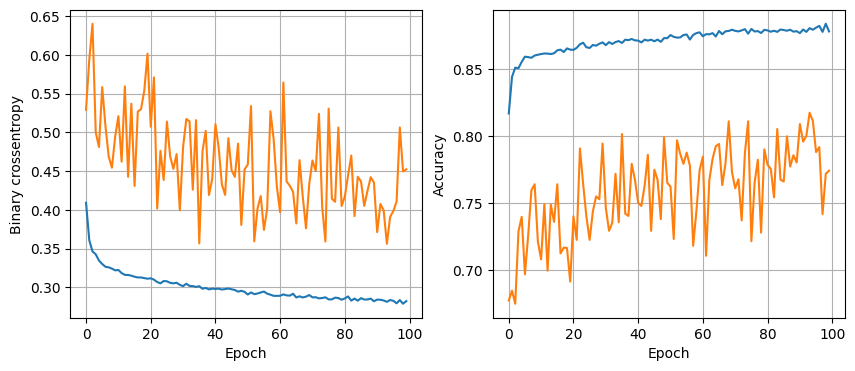

119/119 [==============================] - 0s 2ms/step - loss: 0.3181 - accuracy: 0.8722
16 nodes, dropout 0, lr 0.01, batch_size 64


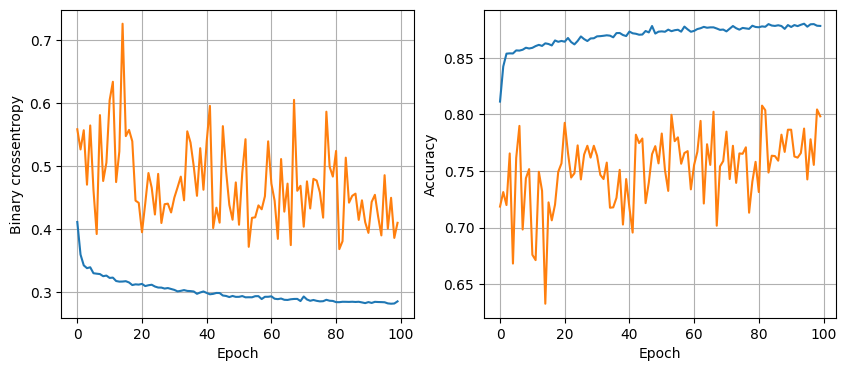

119/119 [==============================] - 0s 2ms/step - loss: 0.3086 - accuracy: 0.8783
16 nodes, dropout 0, lr 0.01, batch_size 128


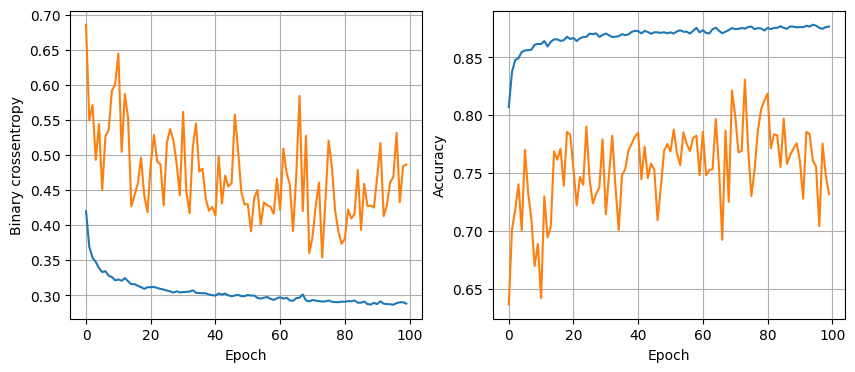

119/119 [==============================] - 0s 2ms/step - loss: 0.3081 - accuracy: 0.8749
16 nodes, dropout 0, lr 0.005, batch_size 32


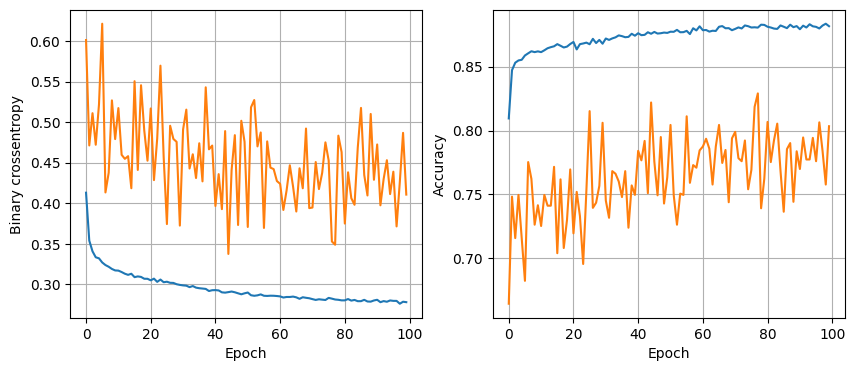

119/119 [==============================] - 0s 2ms/step - loss: 0.3112 - accuracy: 0.8720
16 nodes, dropout 0, lr 0.005, batch_size 64


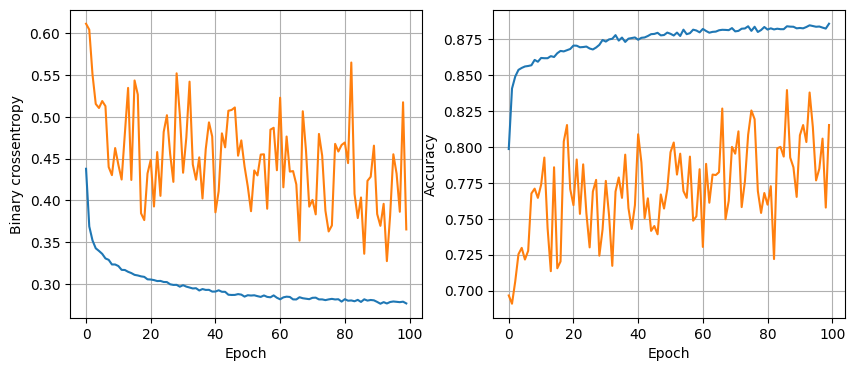

119/119 [==============================] - 0s 2ms/step - loss: 0.3056 - accuracy: 0.8772
16 nodes, dropout 0, lr 0.005, batch_size 128


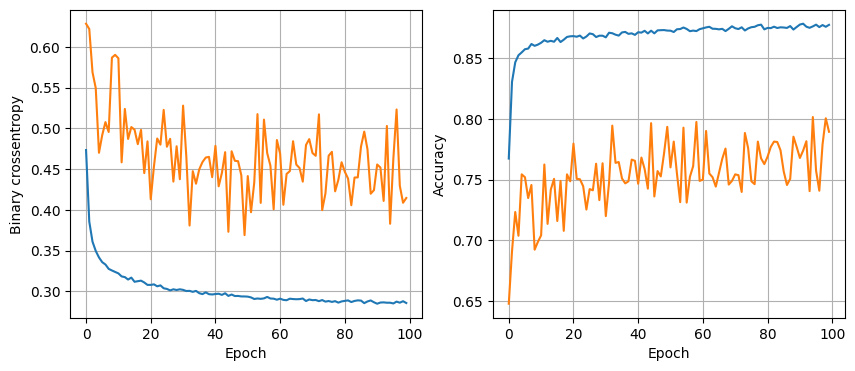

119/119 [==============================] - 0s 2ms/step - loss: 0.3090 - accuracy: 0.8772
16 nodes, dropout 0, lr 0.001, batch_size 32


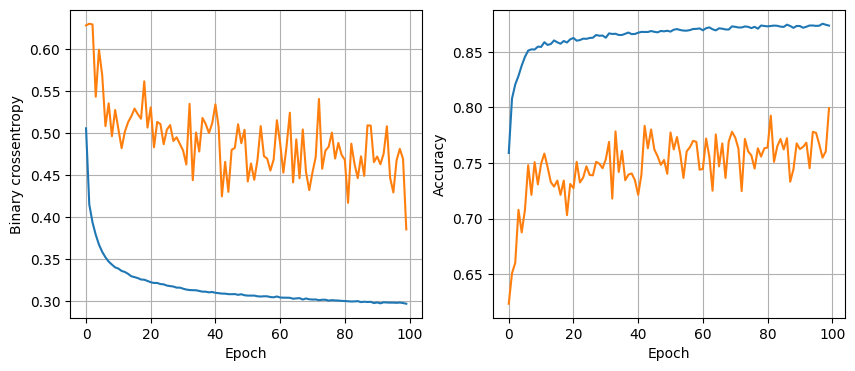

119/119 [==============================] - 0s 2ms/step - loss: 0.3144 - accuracy: 0.8736
16 nodes, dropout 0, lr 0.001, batch_size 64


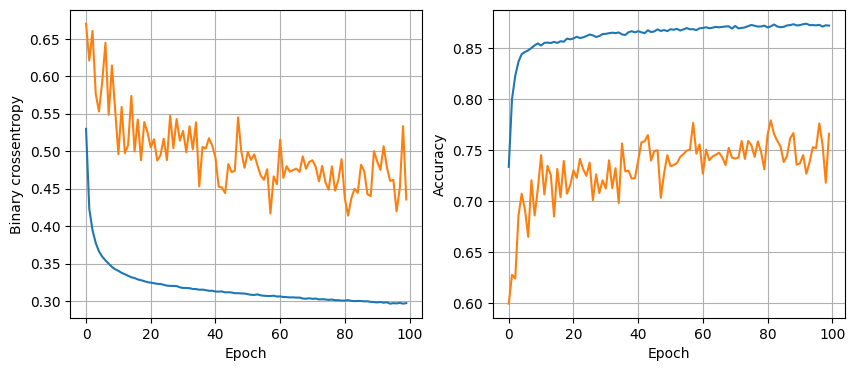

119/119 [==============================] - 0s 2ms/step - loss: 0.2982 - accuracy: 0.8754
16 nodes, dropout 0, lr 0.001, batch_size 128


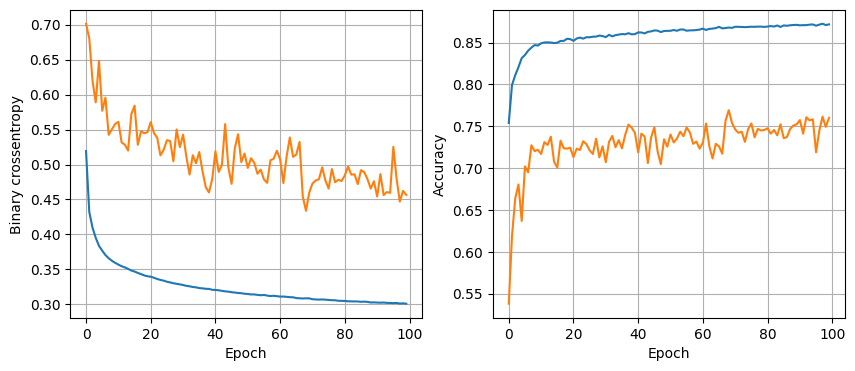

119/119 [==============================] - 0s 2ms/step - loss: 0.3003 - accuracy: 0.8780
16 nodes, dropout 0.2, lr 0.01, batch_size 32


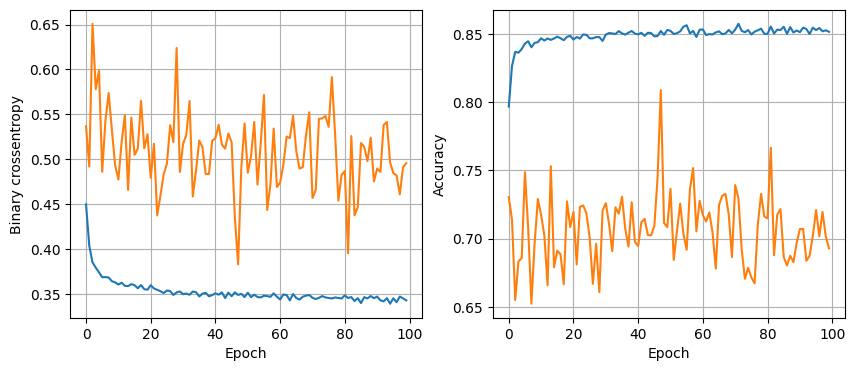

119/119 [==============================] - 0s 2ms/step - loss: 0.3168 - accuracy: 0.8746
16 nodes, dropout 0.2, lr 0.01, batch_size 64


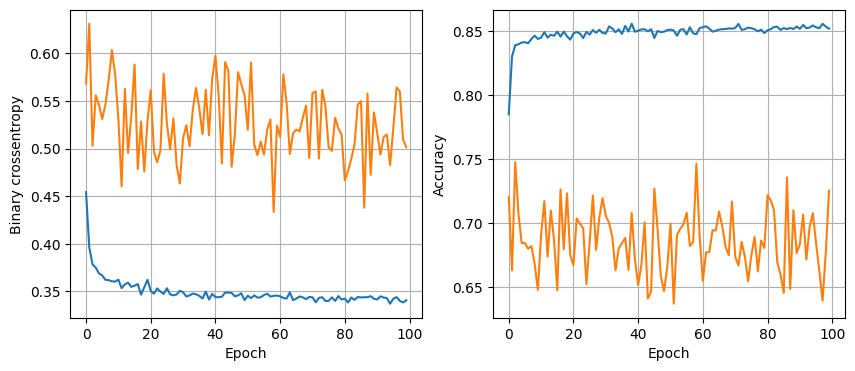

119/119 [==============================] - 0s 2ms/step - loss: 0.3163 - accuracy: 0.8693
16 nodes, dropout 0.2, lr 0.01, batch_size 128


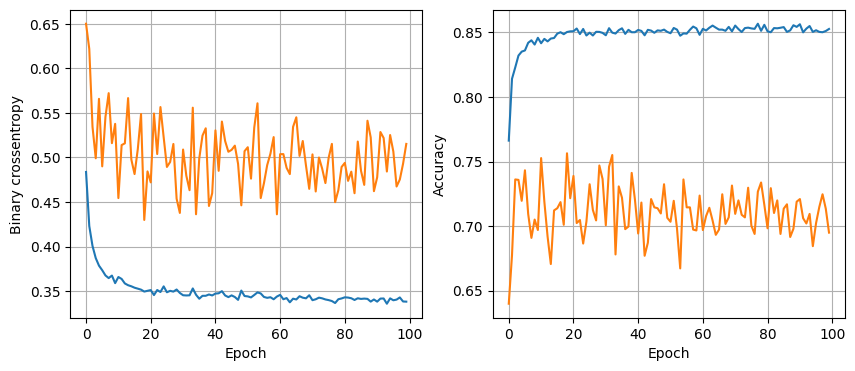

119/119 [==============================] - 0s 2ms/step - loss: 0.3142 - accuracy: 0.8725
16 nodes, dropout 0.2, lr 0.005, batch_size 32


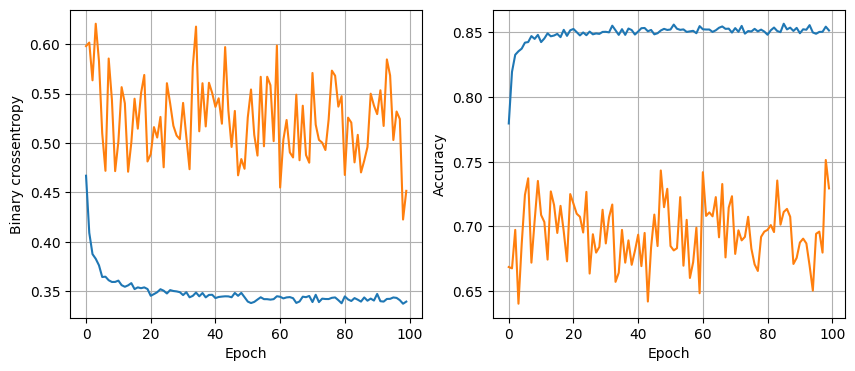

119/119 [==============================] - 0s 2ms/step - loss: 0.3122 - accuracy: 0.8759
16 nodes, dropout 0.2, lr 0.005, batch_size 64


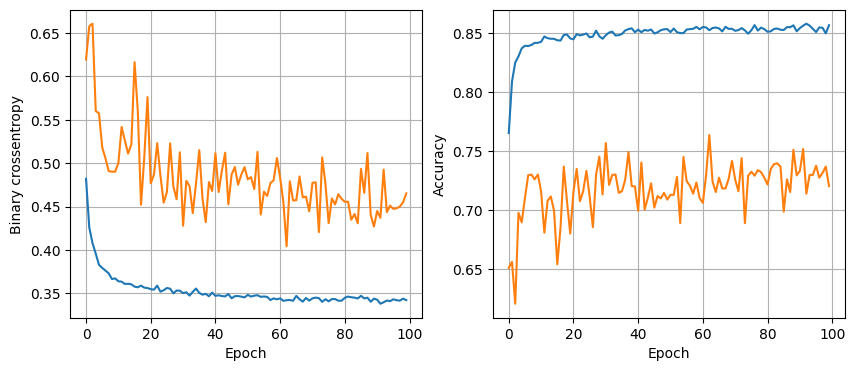

119/119 [==============================] - 0s 2ms/step - loss: 0.3202 - accuracy: 0.8738
16 nodes, dropout 0.2, lr 0.005, batch_size 128


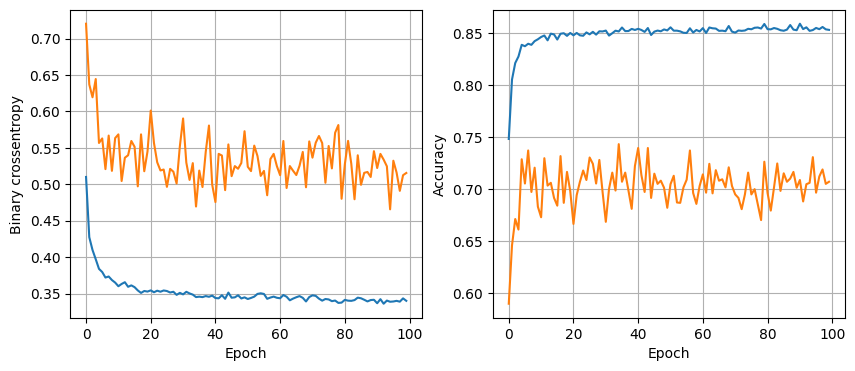

119/119 [==============================] - 0s 3ms/step - loss: 0.3106 - accuracy: 0.8751
16 nodes, dropout 0.2, lr 0.001, batch_size 32


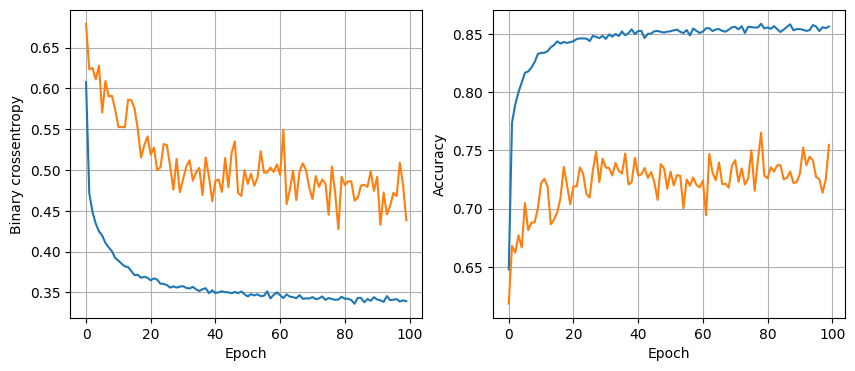

119/119 [==============================] - 0s 2ms/step - loss: 0.3120 - accuracy: 0.8783
16 nodes, dropout 0.2, lr 0.001, batch_size 64


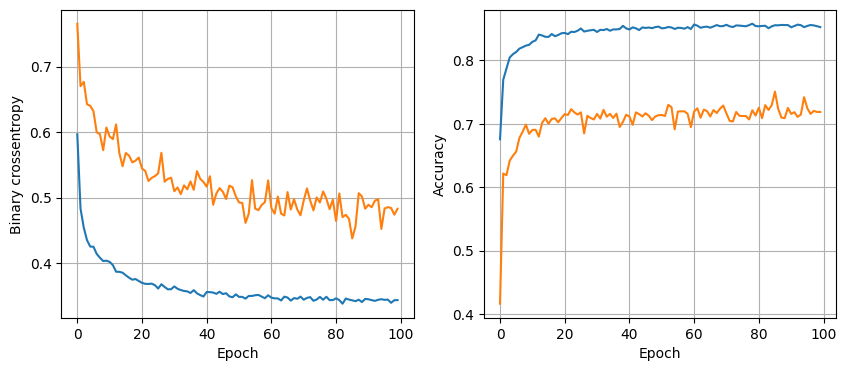

119/119 [==============================] - 0s 2ms/step - loss: 0.3133 - accuracy: 0.8743
16 nodes, dropout 0.2, lr 0.001, batch_size 128


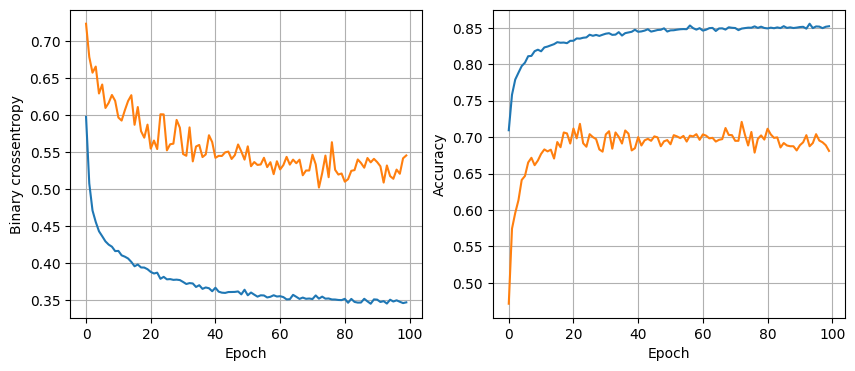

119/119 [==============================] - 0s 2ms/step - loss: 0.3138 - accuracy: 0.8720
32 nodes, dropout 0, lr 0.01, batch_size 32


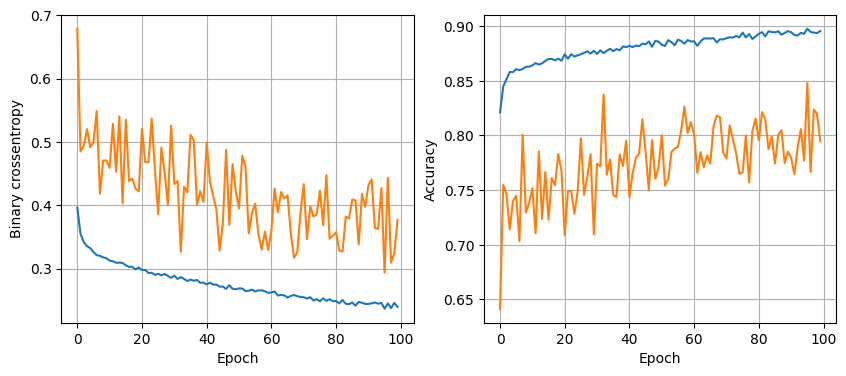

119/119 [==============================] - 0s 3ms/step - loss: 0.4056 - accuracy: 0.8591
32 nodes, dropout 0, lr 0.01, batch_size 64


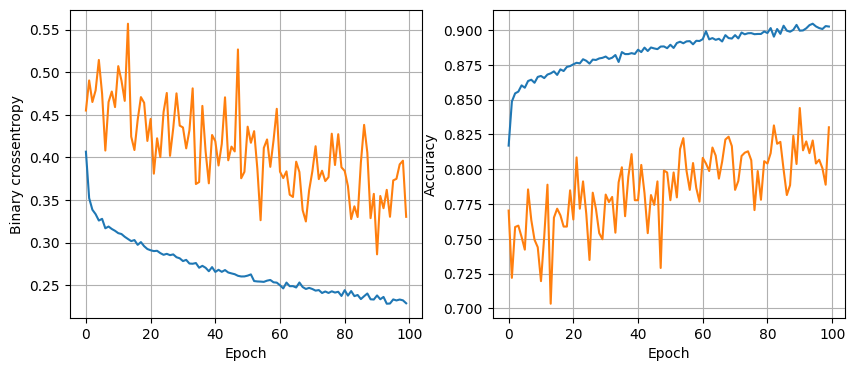

119/119 [==============================] - 0s 2ms/step - loss: 0.3491 - accuracy: 0.8733
32 nodes, dropout 0, lr 0.01, batch_size 128


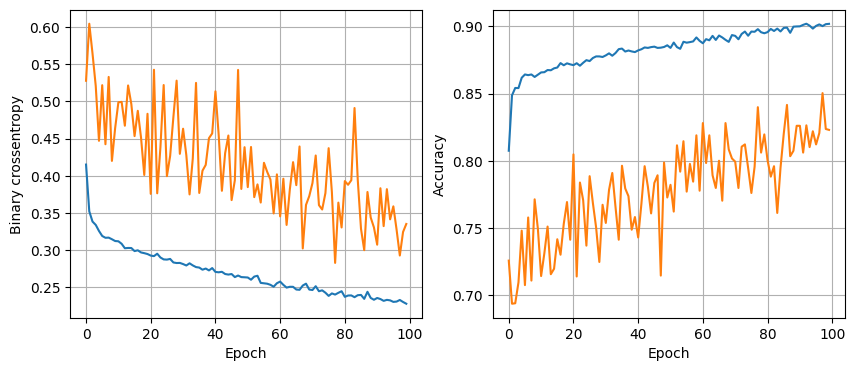

119/119 [==============================] - 0s 2ms/step - loss: 0.4002 - accuracy: 0.8641
32 nodes, dropout 0, lr 0.005, batch_size 32


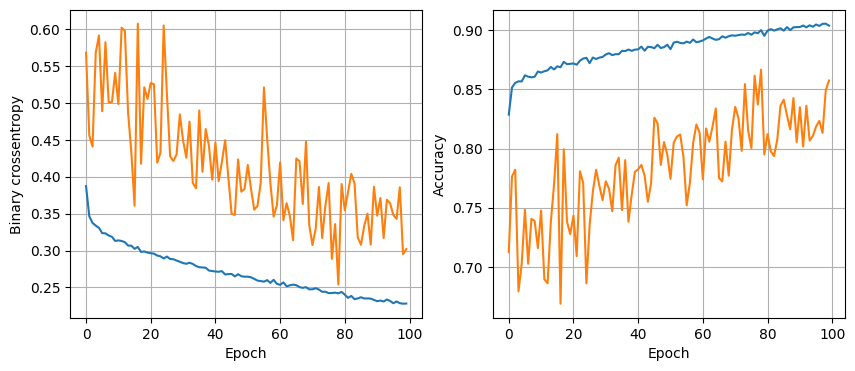

119/119 [==============================] - 0s 2ms/step - loss: 0.3697 - accuracy: 0.8607
32 nodes, dropout 0, lr 0.005, batch_size 64


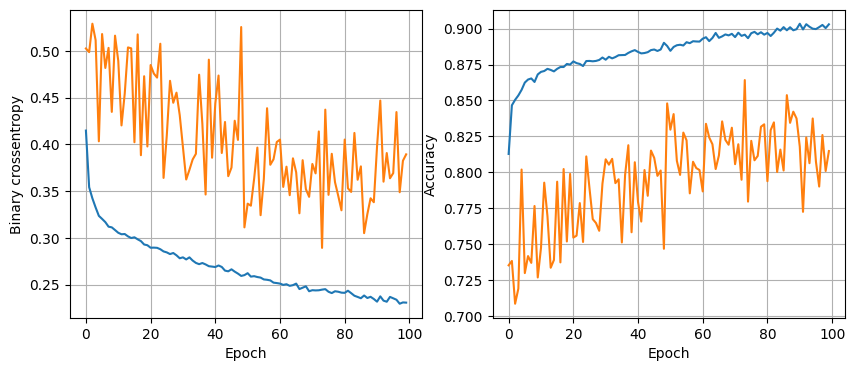

119/119 [==============================] - 0s 2ms/step - loss: 0.3588 - accuracy: 0.8696
32 nodes, dropout 0, lr 0.005, batch_size 128


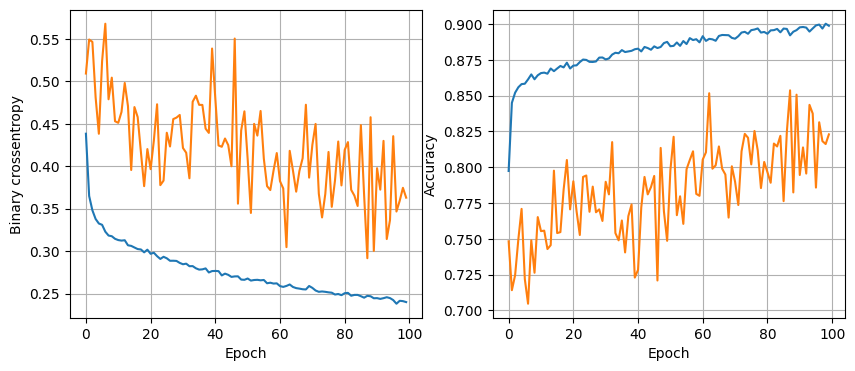

119/119 [==============================] - 0s 2ms/step - loss: 0.3325 - accuracy: 0.8738
32 nodes, dropout 0, lr 0.001, batch_size 32


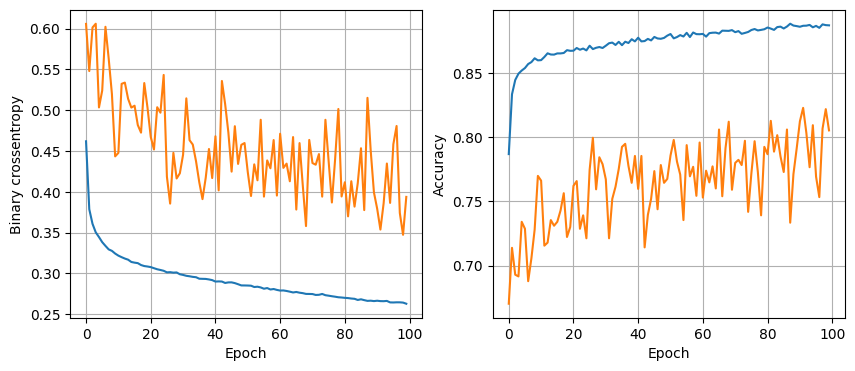

119/119 [==============================] - 0s 2ms/step - loss: 0.3094 - accuracy: 0.8746
32 nodes, dropout 0, lr 0.001, batch_size 64


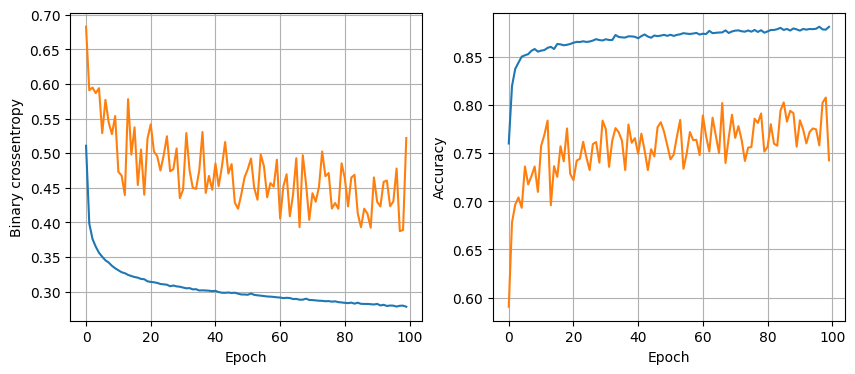

119/119 [==============================] - 0s 3ms/step - loss: 0.3035 - accuracy: 0.8767
32 nodes, dropout 0, lr 0.001, batch_size 128


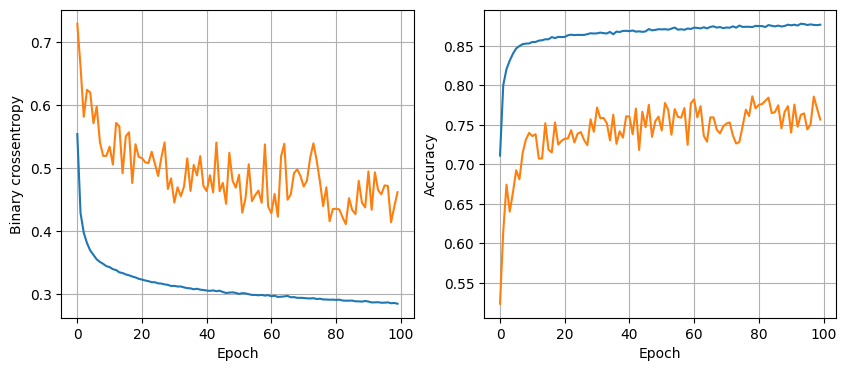

119/119 [==============================] - 0s 3ms/step - loss: 0.2992 - accuracy: 0.8785
32 nodes, dropout 0.2, lr 0.01, batch_size 32


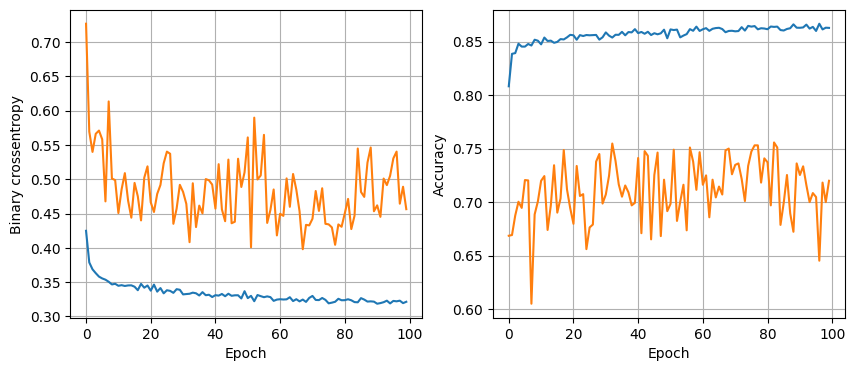

119/119 [==============================] - 0s 2ms/step - loss: 0.3096 - accuracy: 0.8751
32 nodes, dropout 0.2, lr 0.01, batch_size 64


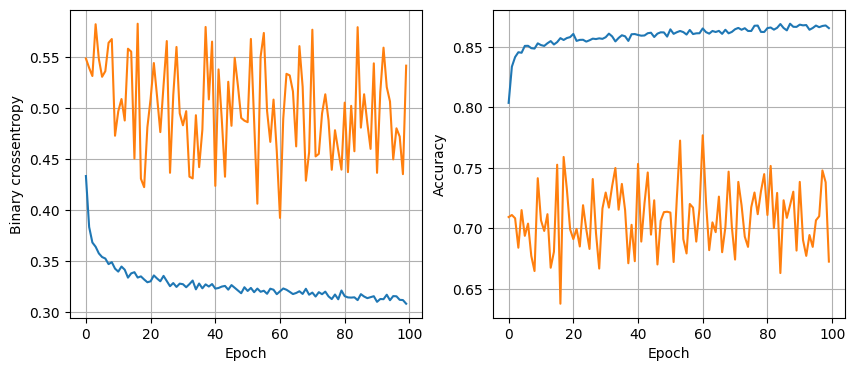

119/119 [==============================] - 0s 2ms/step - loss: 0.3095 - accuracy: 0.8701
32 nodes, dropout 0.2, lr 0.01, batch_size 128


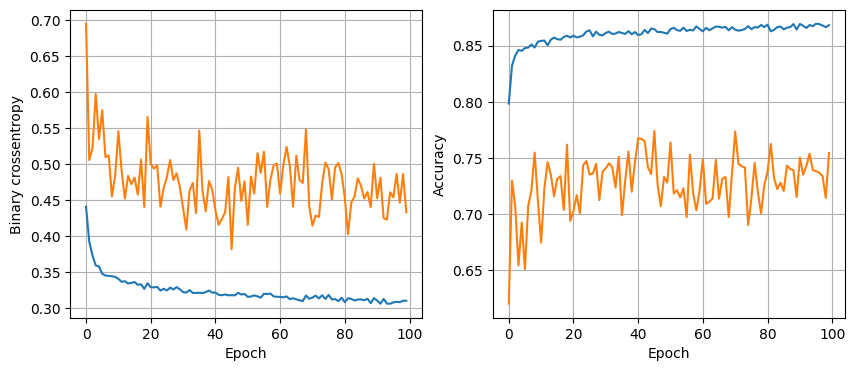

119/119 [==============================] - 0s 3ms/step - loss: 0.2963 - accuracy: 0.8822
32 nodes, dropout 0.2, lr 0.005, batch_size 32


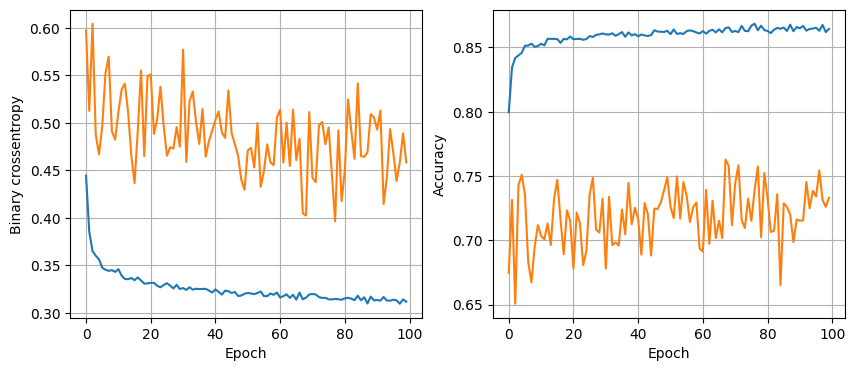

119/119 [==============================] - 0s 2ms/step - loss: 0.2986 - accuracy: 0.8817
32 nodes, dropout 0.2, lr 0.005, batch_size 64


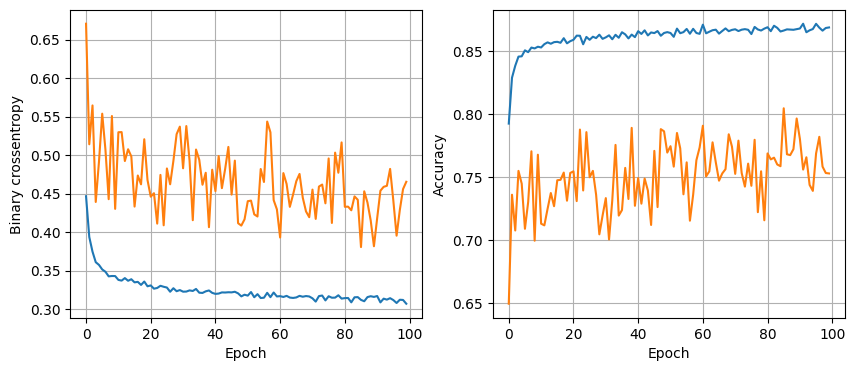

119/119 [==============================] - 0s 2ms/step - loss: 0.2958 - accuracy: 0.8838
32 nodes, dropout 0.2, lr 0.005, batch_size 128


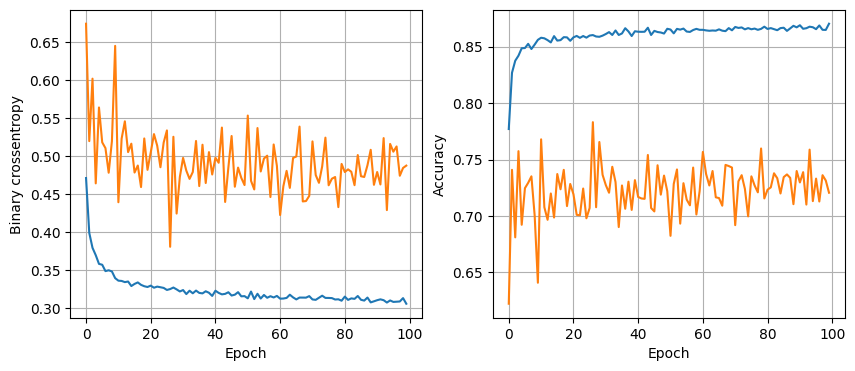

119/119 [==============================] - 0s 2ms/step - loss: 0.2975 - accuracy: 0.8822
32 nodes, dropout 0.2, lr 0.001, batch_size 32


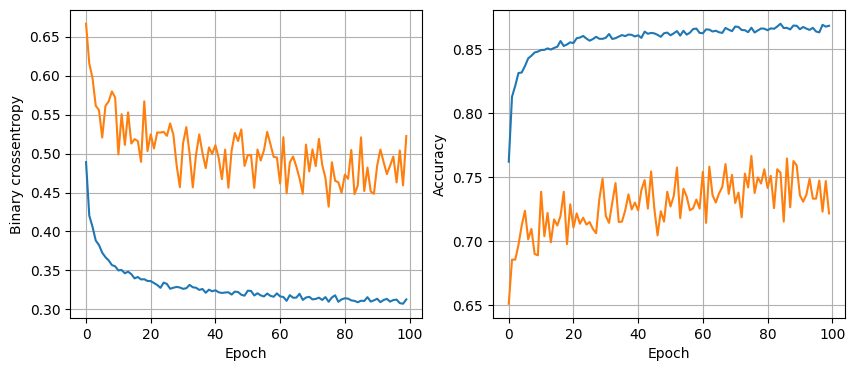

119/119 [==============================] - 0s 3ms/step - loss: 0.2978 - accuracy: 0.8785
32 nodes, dropout 0.2, lr 0.001, batch_size 64


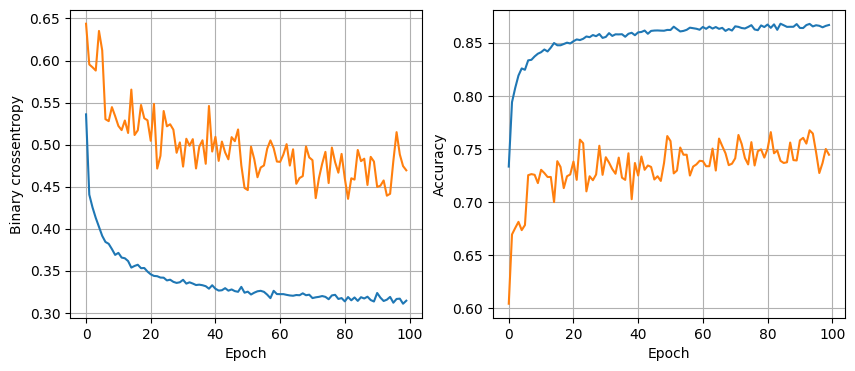

119/119 [==============================] - 0s 3ms/step - loss: 0.2960 - accuracy: 0.8788
32 nodes, dropout 0.2, lr 0.001, batch_size 128


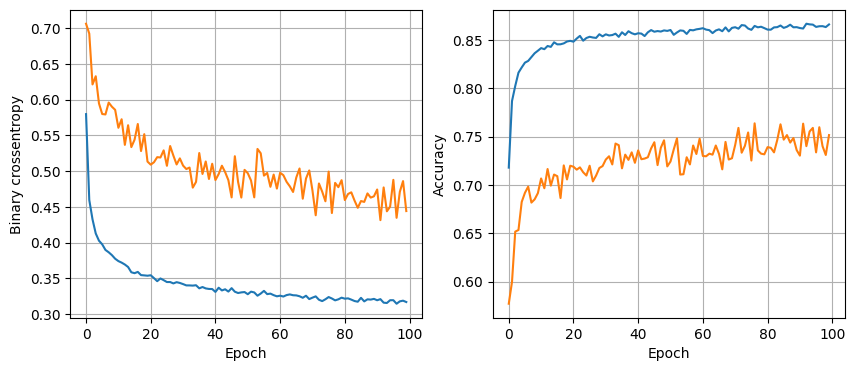

119/119 [==============================] - 0s 2ms/step - loss: 0.2931 - accuracy: 0.8814
64 nodes, dropout 0, lr 0.01, batch_size 32


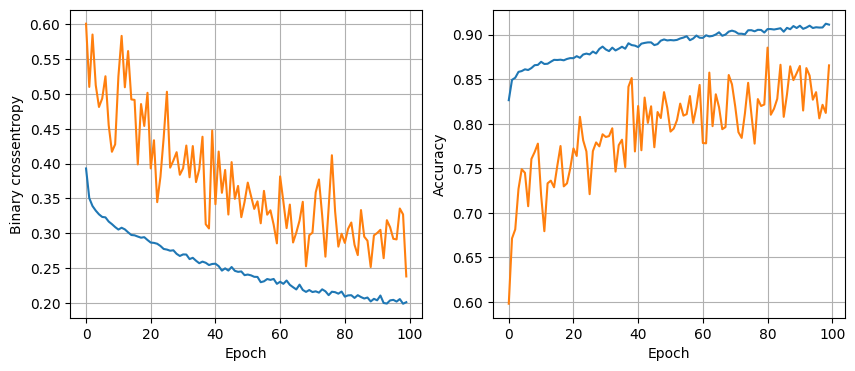

119/119 [==============================] - 0s 3ms/step - loss: 0.4944 - accuracy: 0.8575
64 nodes, dropout 0, lr 0.01, batch_size 64


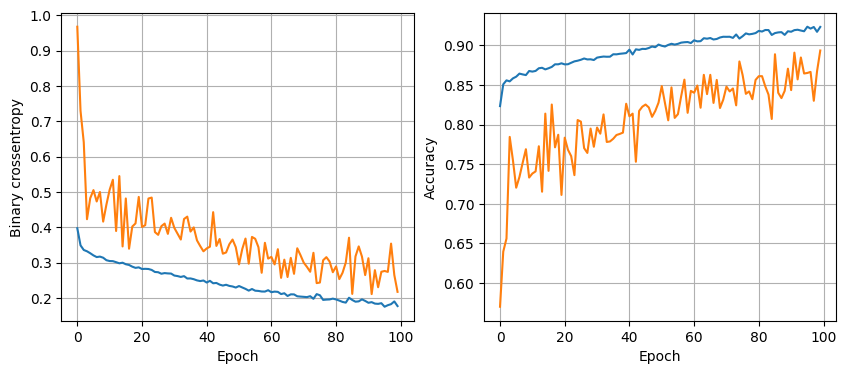

119/119 [==============================] - 0s 2ms/step - loss: 0.4892 - accuracy: 0.8662
64 nodes, dropout 0, lr 0.01, batch_size 128


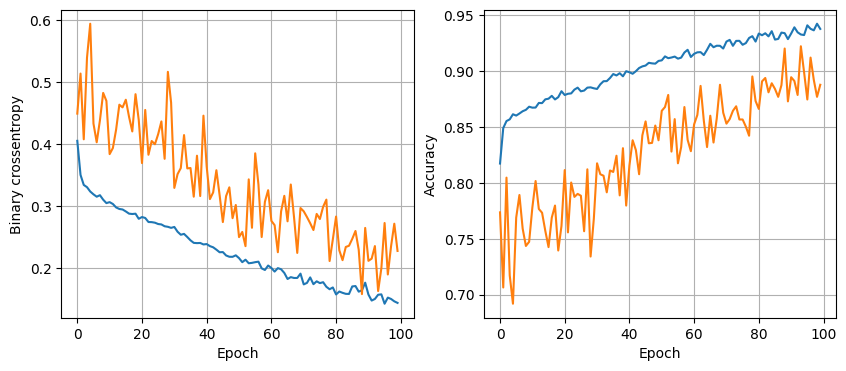

119/119 [==============================] - 0s 3ms/step - loss: 0.5630 - accuracy: 0.8604
64 nodes, dropout 0, lr 0.005, batch_size 32


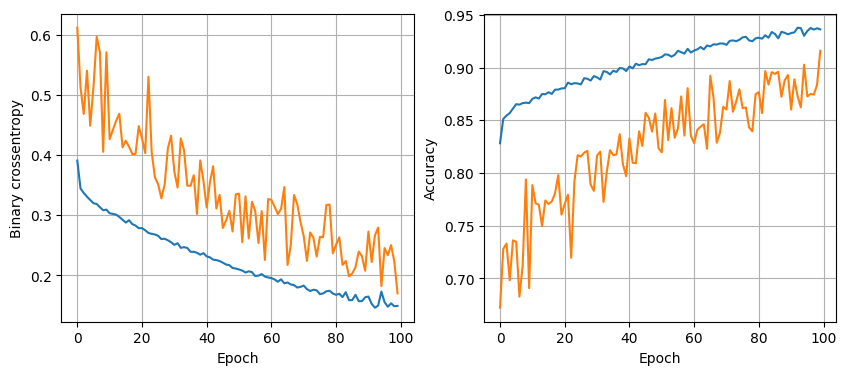

119/119 [==============================] - 0s 3ms/step - loss: 0.5608 - accuracy: 0.8457
64 nodes, dropout 0, lr 0.005, batch_size 64


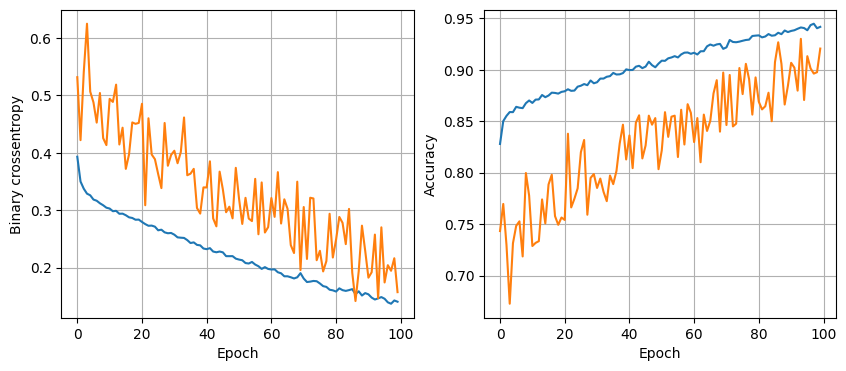

119/119 [==============================] - 0s 3ms/step - loss: 0.6088 - accuracy: 0.8517
64 nodes, dropout 0, lr 0.005, batch_size 128


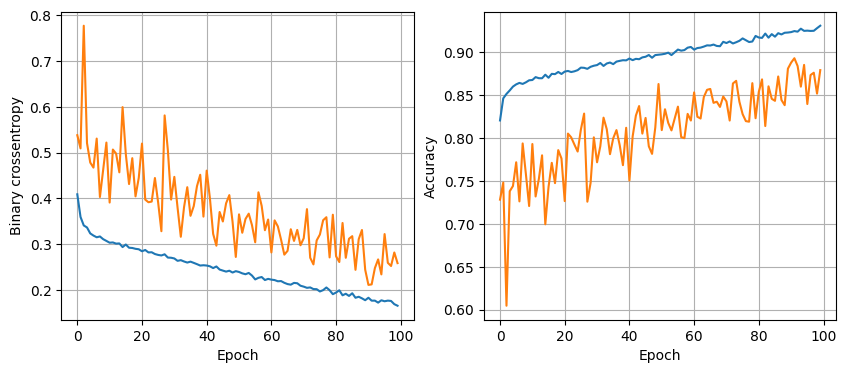

119/119 [==============================] - 0s 3ms/step - loss: 0.4317 - accuracy: 0.8672
64 nodes, dropout 0, lr 0.001, batch_size 32


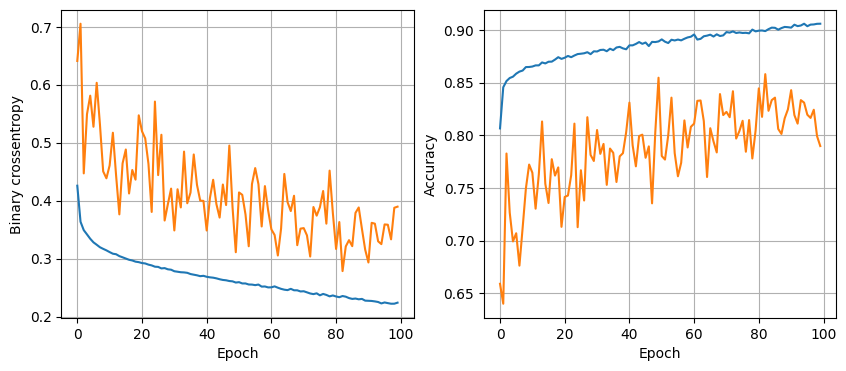

119/119 [==============================] - 0s 2ms/step - loss: 0.3324 - accuracy: 0.8722
64 nodes, dropout 0, lr 0.001, batch_size 64


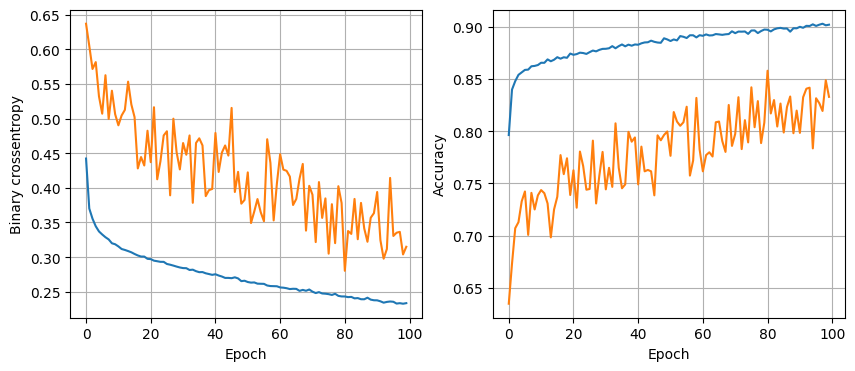

119/119 [==============================] - 0s 2ms/step - loss: 0.3165 - accuracy: 0.8770
64 nodes, dropout 0, lr 0.001, batch_size 128


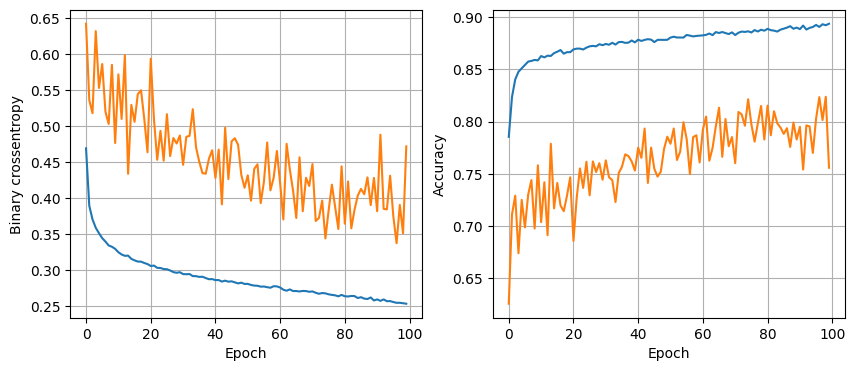

119/119 [==============================] - 0s 2ms/step - loss: 0.3110 - accuracy: 0.8785
64 nodes, dropout 0.2, lr 0.01, batch_size 32


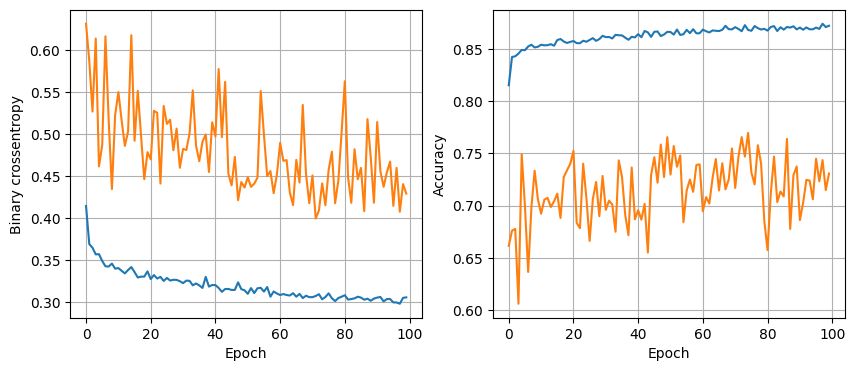

119/119 [==============================] - 0s 3ms/step - loss: 0.3213 - accuracy: 0.8725
64 nodes, dropout 0.2, lr 0.01, batch_size 64


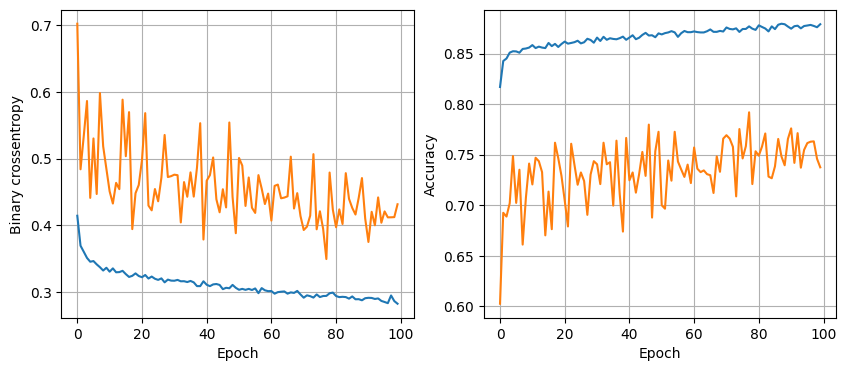

119/119 [==============================] - 0s 3ms/step - loss: 0.2987 - accuracy: 0.8762
64 nodes, dropout 0.2, lr 0.01, batch_size 128


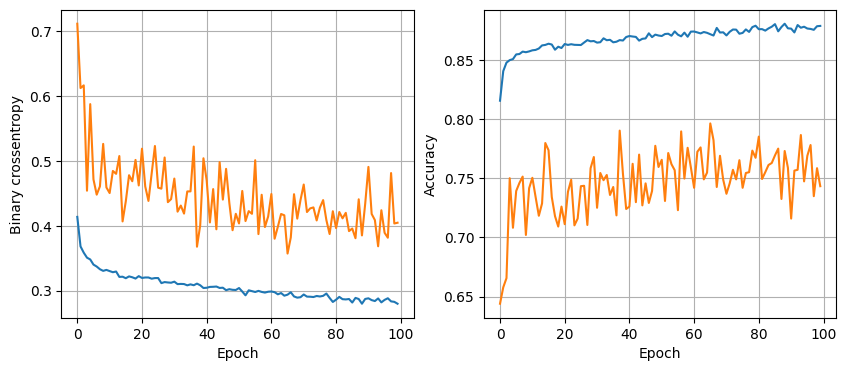

119/119 [==============================] - 0s 3ms/step - loss: 0.2969 - accuracy: 0.8820
64 nodes, dropout 0.2, lr 0.005, batch_size 32


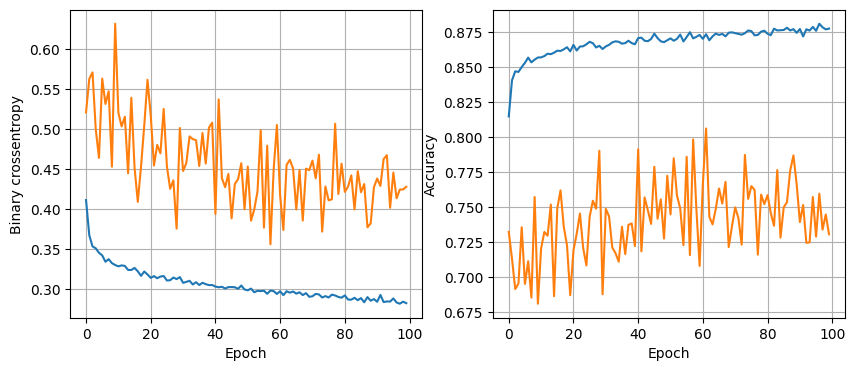

119/119 [==============================] - 0s 2ms/step - loss: 0.3039 - accuracy: 0.8707
64 nodes, dropout 0.2, lr 0.005, batch_size 64


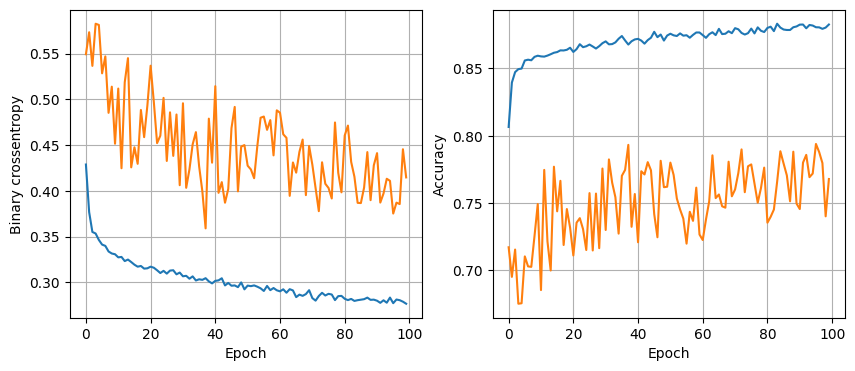

119/119 [==============================] - 0s 3ms/step - loss: 0.2940 - accuracy: 0.8833
64 nodes, dropout 0.2, lr 0.005, batch_size 128


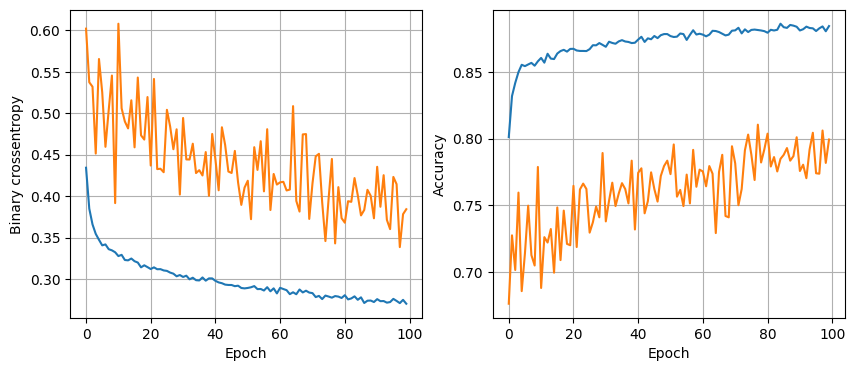

119/119 [==============================] - 0s 2ms/step - loss: 0.2916 - accuracy: 0.8822
64 nodes, dropout 0.2, lr 0.001, batch_size 32


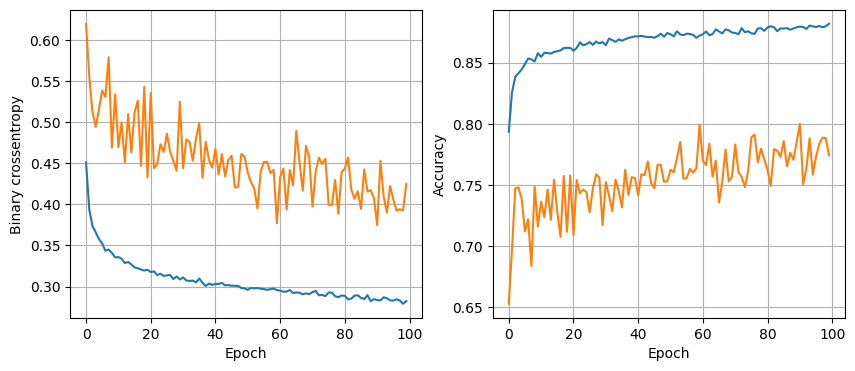

119/119 [==============================] - 0s 4ms/step - loss: 0.2856 - accuracy: 0.8870
64 nodes, dropout 0.2, lr 0.001, batch_size 64


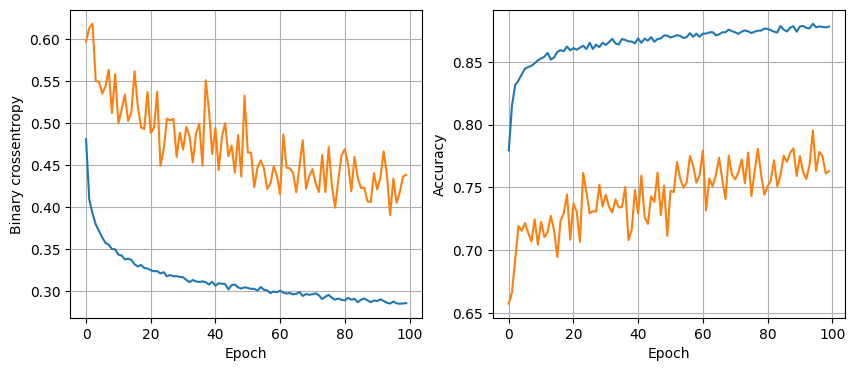

119/119 [==============================] - 0s 2ms/step - loss: 0.2892 - accuracy: 0.8814
64 nodes, dropout 0.2, lr 0.001, batch_size 128


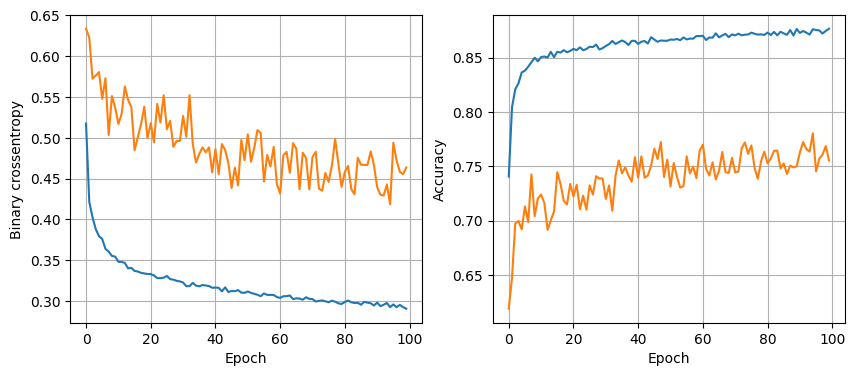

119/119 [==============================] - 0s 2ms/step - loss: 0.2877 - accuracy: 0.8851


In [ ]:
least_val_loss = float("inf")
least_loss_model = None
epochs= 100
for num_nodes in [16, 32, 64]:
  for dropout_prob in [0, 0.2]:
    for lr in [0.01, 0.005, 0.001]:
      for batch_size in [32, 64, 128]:
        print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch_size {batch_size}")
        model, history = train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
        plot_history(history)
        val_loss = model.evaluate(X_valid, y_valid)[0]
        if val_loss < least_val_loss:
          least_val_loss = val_loss
          least_loss_model = model

In [ ]:
y_pred = least_loss_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)

119/119 [==============================] - 0s 2ms/step


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.75      0.82      1321
           1       0.88      0.95      0.91      2483

    accuracy                           0.88      3804
   macro avg       0.89      0.85      0.87      3804
weighted avg       0.88      0.88      0.88      3804

